In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 0, 'U wind component (m/s)')

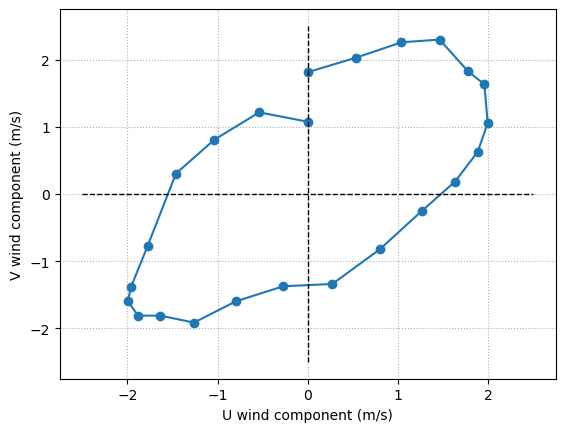

In [38]:
#Generate some random data with 24 hourly samples
h = np.linspace(0, 2 * np.pi, 24)
u = 2*np.sin(h)
v = 2*np.sin(h+np.pi/4)

#Plot the data
plt.plot(u,
        np.random.uniform(v-0.4, v+0.4, 24),
        marker='o', linestyle='-', color='tab:blue')
plt.gca().grid(ls=":")
plt.plot([0, 0], [-2.5, 2.5], color='k', lw=1, ls="--")
plt.plot([-2.5, 2.5], [0, 0], color='k', lw=1, ls="--")
plt.ylabel("V wind component (m/s)")
plt.xlabel("U wind component (m/s)")

Use the least-squares ellipse fitting package by:

From Ben Hammel, & Nick Sullivan-Molina. (2020, March 21). bdhammel/least-squares-ellipse-fitting: v2.0.0 (Version v2.0.0). Zenodo. http://doi.org/10.5281/zenodo.3723294, 

to get ellipse parameters (centre, width, height, phi)

In [39]:
from ellipse import LsqEllipse

X = np.array(list(zip(u, v)))
fit = LsqEllipse().fit(X)

center, width, height, phi = fit.as_parameters()

print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')



center: -0.000, -0.000
width: 2.613
height: 1.082
phi: 0.785


In [40]:
#Now convert the ellipse parameters to a parametric form
#u = u0 + u1 * cos(t) + u2 * sin(t)
#v = v0 + v1 * cos(t) + v2 * sin(t)

u0, v0 = center
u1 = width * np.cos(phi)
u2 = -height * np.sin(phi)
v1 = width * np.sin(phi)
v2 = height * np.cos(phi)

print("\nParametric form:")
print(f"u = {u0:.3f} + {u1:.3f} * cos(t) + {u2:.3f} * sin(t)")
print(f"v = {v0:.3f} + {v1:.3f} * cos(t) + {v2:.3f} * sin(t)")



Parametric form:
u = -0.000 + 1.848 * cos(t) + -0.765 * sin(t)
v = -0.000 + 1.848 * cos(t) + 0.765 * sin(t)


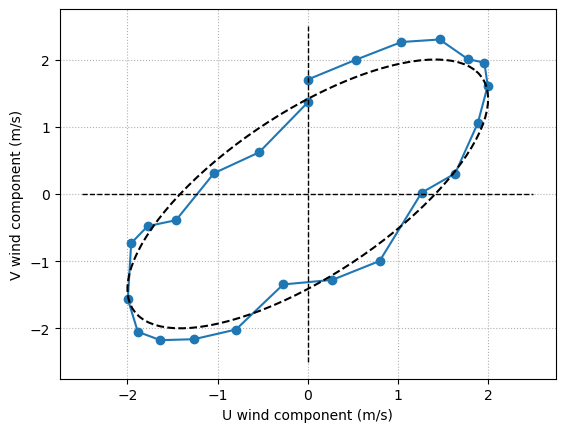

In [42]:
#Plot the original data
plt.plot(u,
        np.random.uniform(v-0.4, v+0.4, 24),
        marker='o', linestyle='-', color='tab:blue')
plt.gca().grid(ls=":")
plt.plot([0, 0], [-2.5, 2.5], color='k', lw=1, ls="--")
plt.plot([-2.5, 2.5], [0, 0], color='k', lw=1, ls="--")
plt.ylabel("V wind component (m/s)")
plt.xlabel("U wind component (m/s)")

#Plot the fitted ellipse with the parametric form using 100 points
t = np.linspace(0, 2 * np.pi, 100)
ufit = u0 + u1 * np.cos(t) + u2 * np.sin(t)
vfit = v0 + v1 * np.cos(t) + v2 * np.sin(t)
plt.plot(ufit, vfit, color="k", ls="--")

In [52]:
0.5 * np.arctan2(
    2*(u1*u2 + v1*v2),
    u1**2 + v1**2 - u2**2 - v2**2
)

np.float64(3.9252311467094465e-17)

In [50]:
u[0]

np.float64(0.0)